In [10]:
%pip install pandas 
%pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
print(train_data.head())
print(test_data.head())

   time         A         B         C         D         E         F         G  \
0     0  0.207366 -0.159951 -0.634176 -0.580962 -0.266505  0.060173 -0.475257   
1     1  0.188828 -0.265508  0.042143 -0.550442 -0.132319 -0.185219  0.028295   
2     2 -0.144261 -0.577142 -0.214634 -0.747391 -0.184255 -0.464831 -0.085181   
3     3  0.208982 -0.310449  0.513708 -0.562868  0.742308 -0.305487  0.762246   
4     4  0.093320 -0.358156  0.173188 -0.687296 -0.161461 -0.116062 -0.245748   

          H         I         J         K         L         M         N  \
0 -1.486516 -0.332594 -0.671466 -0.226149 -0.187624 -0.780237 -0.785965   
1  0.093210 -0.518139 -0.251917 -0.347845 -0.359069 -0.161254  0.020401   
2  0.700449 -0.603438  0.197773 -0.566696 -0.580799  0.202726  0.135261   
3  1.363020 -0.384575  0.525556 -0.348514 -0.428099  0.548993  0.471031   
4  0.863372 -0.655588 -0.263358 -0.557428 -0.481214  0.083602  0.003087   

         Y1        Y2  
0 -0.935902 -0.310081  
1 -0.089707 -0

In [12]:
correlation = train_data['D'].corr(train_data['Y1'])
print(f"Correlation between D and Y1: {correlation:.4f}")

Correlation between D and Y1: -0.0571


In [13]:
preds = test_data[['id']]
preds['Y1'] = test_data['C']
preds['Y2'] = test_data['C']
preds

/var/folders/g5/r3drffsd5sb9wnsb9_8n8d4r0000gn/T/ipykernel_39270/619825211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['Y1'] = test_data['C']
/var/folders/g5/r3drffsd5sb9wnsb9_8n8d4r0000gn/T/ipykernel_39270/619825211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['Y2'] = test_data['C']


,id,Y1,Y2
0,1,0.538326,0.538326
1,2,-0.235153,-0.235153
2,3,-0.629131,-0.629131
3,4,-1.142702,-1.142702
4,5,-1.099371,-1.099371
...,...,...,...
15991,15992,-0.050846,-0.050846
15992,15993,-0.454017,-0.454017
15993,15994,0.403098,0.403098
15994,15995,0.541362,0.541362


In [14]:
preds.to_csv('preds.csv', index=False)

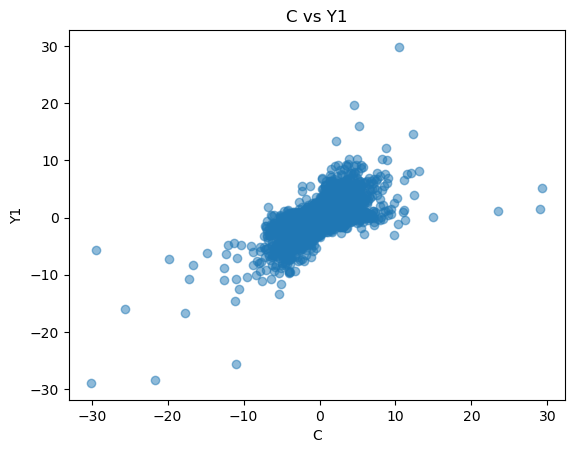

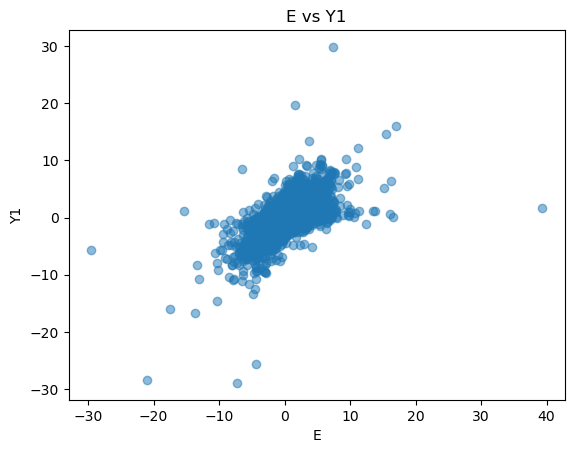

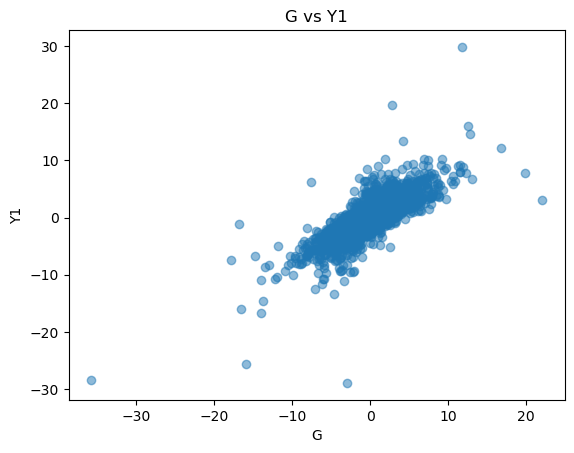

In [17]:
#Analysis 
import matplotlib.pyplot as plt
for col in ['C', 'E', 'G']:
    plt.scatter(train_data[col], train_data['Y1'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Y1")
    plt.title(f"{col} vs Y1")
    plt.show()

In [19]:
%pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [70]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [55]:
X=train_data[['C', 'E', 'G', 'H', 'J', 'M', 'N']]
Y1 = train_data['Y1']
X_train, X_val, Y1_train, Y1_val=train_test_split(X,Y1,test_size=0.2, random_state=42)

In [62]:
#Ridge model
model = Ridge(alpha=0.1, random_state=42).fit(X_train, Y1_train)

In [63]:
Y1_val_pred=model.predict(X_val)

In [64]:
print("R^2 Y1:", r2_score(Y1_val, Y1_val_pred))
print("MAE:", mean_absolute_error(Y1_val, Y1_val_pred))
print("MSE:", mean_squared_error(Y1_val, Y1_val_pred))

R^2 Y1: 0.7775582991586574
MAE: 0.289380174225628
MSE: 0.2026326239258815


In [65]:
#LinearRegression model
model = LinearRegression().fit(X_train, Y1_train)

#jules pull 

In [66]:
Y1_val_pred=model.predict(X_val)

In [68]:
print("R^2 Y1:", r2_score(Y1_val, Y1_val_pred))
print("MAE:", mean_absolute_error(Y1_val, Y1_val_pred))
print("MSE:", mean_squared_error(Y1_val, Y1_val_pred))

R^2 Y1: 0.7775582458195477
MAE: 0.2893801953623767
MSE: 0.20263267251498923


In [76]:
tree=DecisionTreeRegressor(random_state=42, max_depth=10)
tree.fit(X_train, Y1_train)
Y1_val_pred = tree.predict(X_train)

In [77]:
print("R^2 Y1:", r2_score(Y1_val, Y1_val_pred))
print("MAE:", mean_absolute_error(Y1_val, Y1_val_pred))
print("MSE:", mean_squared_error(Y1_val, Y1_val_pred))

ValueError: Found input variables with inconsistent numbers of samples: [16000, 64000]